In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.optim as optim
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import WeightedRandomSampler
from torchvision.utils import save_image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from tqdm import tqdm
from collections import Counter


In [3]:
import torch.nn as nn
from torchvision import models

In [4]:
!pip freeze > requirements.txt

In [7]:
from pathlib import Path
data_path = Path('/kaggle/input/dl-2025-competition-1/data/train')

class_names = sorted([d.name for d in data_path.iterdir() if d.is_dir() and d.name.isdigit()])
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


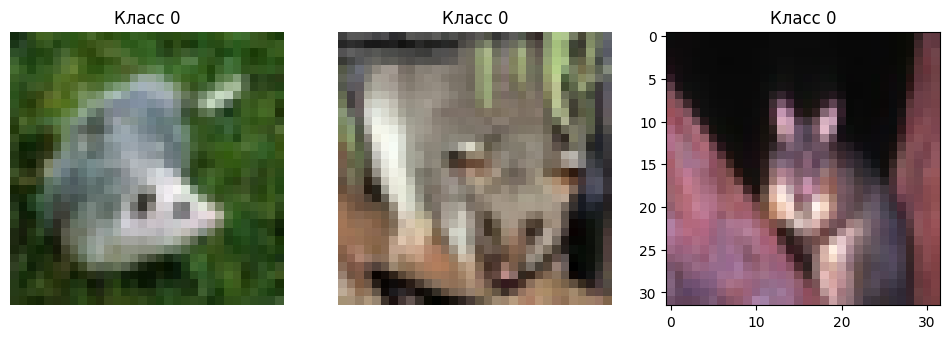

In [5]:
image1 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/0/5930.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/0/5937.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/0/5948.png')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(image1)
ax[0].set_title("Класс 0")
ax[0].axis("off")
ax[1].imshow(image2)
ax[1].set_title("Класс 0")
ax[1].axis("off")
ax[2].imshow(image3)
ax[2].set_title("Класс 0")
plt.show()

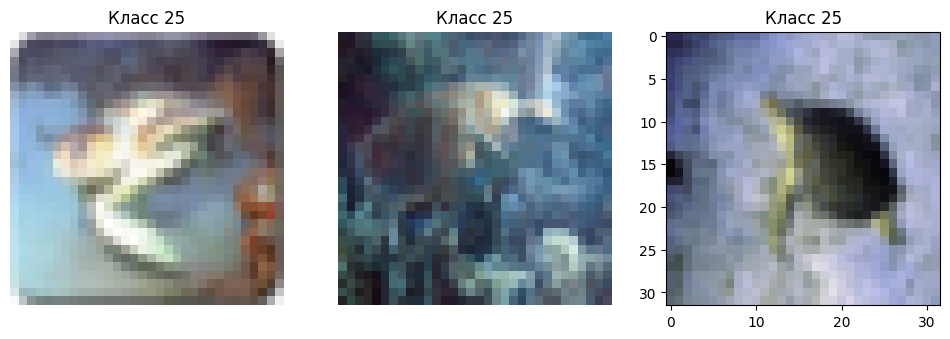

In [10]:
image1 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/25/9005.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/25/9012.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/25/9019.png')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(image1)
ax[0].set_title("Класс 25")
ax[0].axis("off")
ax[1].imshow(image2)
ax[1].set_title("Класс 25")
ax[1].axis("off")
ax[2].imshow(image3)
ax[2].set_title("Класс 25")
plt.show()

В классе 25 картинки не такие контрастные, например на картинке 2. Могут быть проблемы с определением границ. Мб потребуется увеличивать резкость 

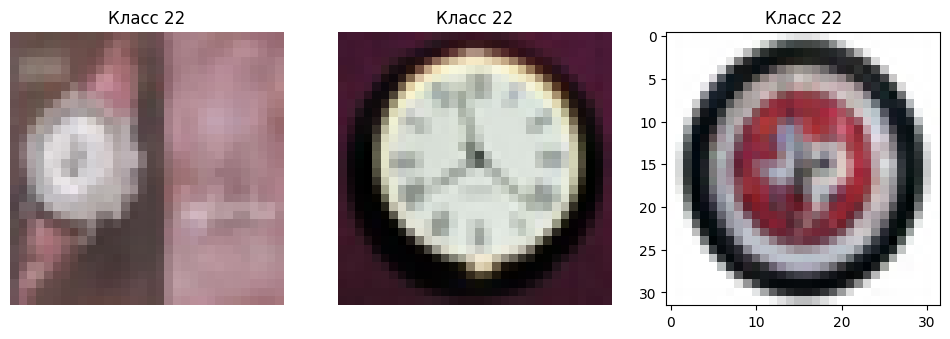

In [11]:
image1 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/57/2110.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/57/2222.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/57/2223.png')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(image1)
ax[0].set_title("Класс 22")
ax[0].axis("off")
ax[1].imshow(image2)
ax[1].set_title("Класс 22")
ax[1].axis("off")
ax[2].imshow(image3)
ax[2].set_title("Класс 22")
plt.show()

А здесь на 1 некоторых фотках не видно стрелок у часов даже.

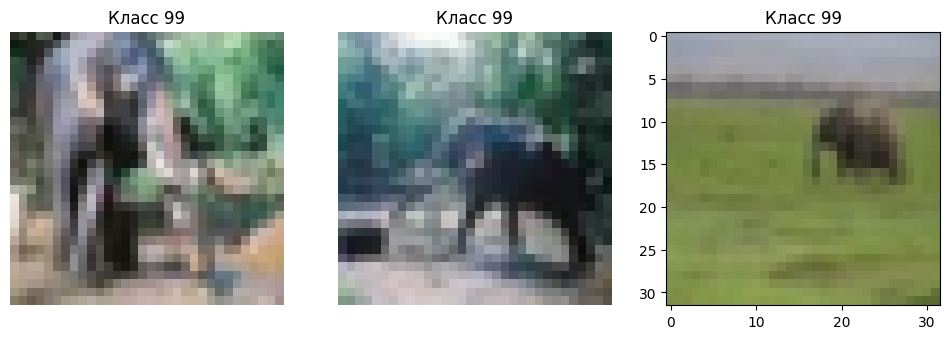

In [12]:

image1 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/99/2794.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/99/2800.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/99/2828.png')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(image1)
ax[0].set_title("Класс 99")
ax[0].axis("off")
ax[1].imshow(image2)
ax[1].set_title("Класс 99")
ax[1].axis("off")
ax[2].imshow(image3)
ax[2].set_title("Класс 99")
plt.show()

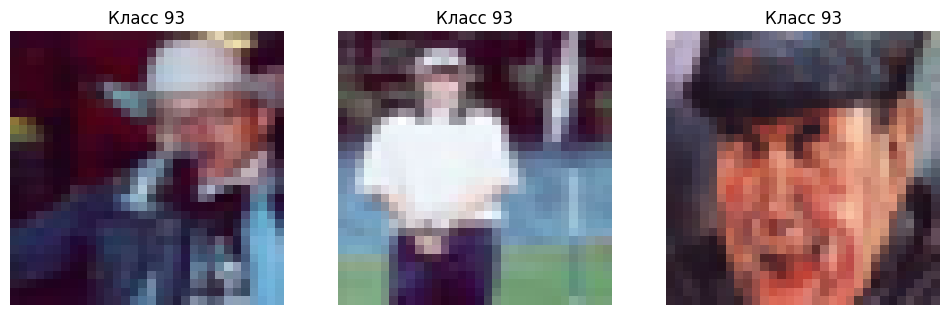

In [13]:

image1 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/93/4404.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/93/4371.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/93/4296.png')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(image1)
ax[0].set_title("Класс 93")
ax[0].axis("off")
ax[1].imshow(image2)
ax[1].set_title("Класс 93")
ax[1].axis("off")
ax[2].imshow(image3)
ax[2].set_title("Класс 93")
ax[2].axis("off")
plt.show()

In [112]:
# Собираем статистику по классам
class_counts = {}
for class_num in class_names:
    class_path = data_path / class_num
    class_counts[f"Class {class_num}"] = len(list(class_path.glob('*.png')))


df_counts = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])

df_counts.describe()

,Count
count,100.000000
mean,95.100000
std,35.439093
min,32.000000
25%,67.500000
50%,100.000000
75%,125.500000
max,150.000000


Какие проблемы вижу в датасете: 
1. В некоторых картинках почти нет контрастности
2. Не всегда видны элементы, по которым человек отличает предметы, например хобот у слона, стрелки часов
3. Объекты закрыты другими объектами (не полностью)
4. Шум в данных (в картинках предметы, не относящиеся к классу) Например: в классе с фотографиями лиц людей фото другой части тела, это нашла в классе 93.
5. Присутсвует дисбаланс классов: разница в размере между самым маленьким и самым большим классом почти в 5 раз. Всё же, большинство классов имеют средний размер 

Часть 2. Аугментация

Возьму картинку, которая меня сильно смущает и попробую сделать из неё что-то более различаемое.

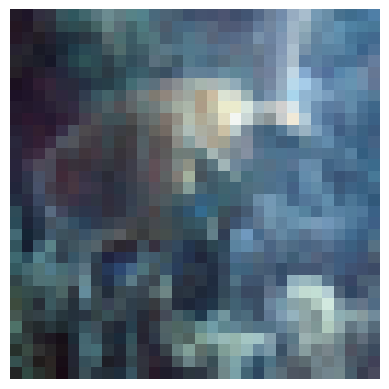

In [15]:
image = cv2.imread('/kaggle/input/dl-2025-competition-1/data/train/25/9012.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.show()

(-0.5, 31.5, 31.5, -0.5)

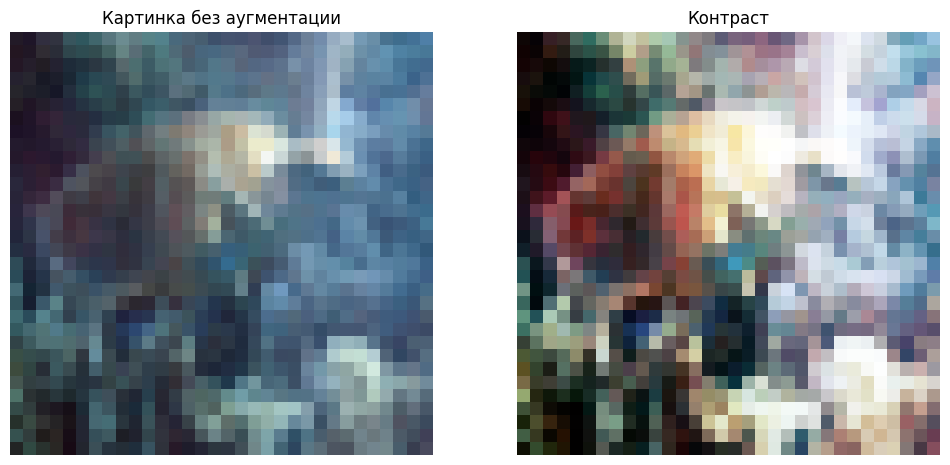

In [16]:
transform = A.Compose([
    A.AutoContrast(p=1.0),
])
augmented = transform(image=image)
image_augmented = augmented["image"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Картинка без аугментации")
ax[0].axis("off")
ax[1].imshow(image_augmented)
ax[1].set_title("Контраст")
ax[1].axis("off")

(-0.5, 31.5, 31.5, -0.5)

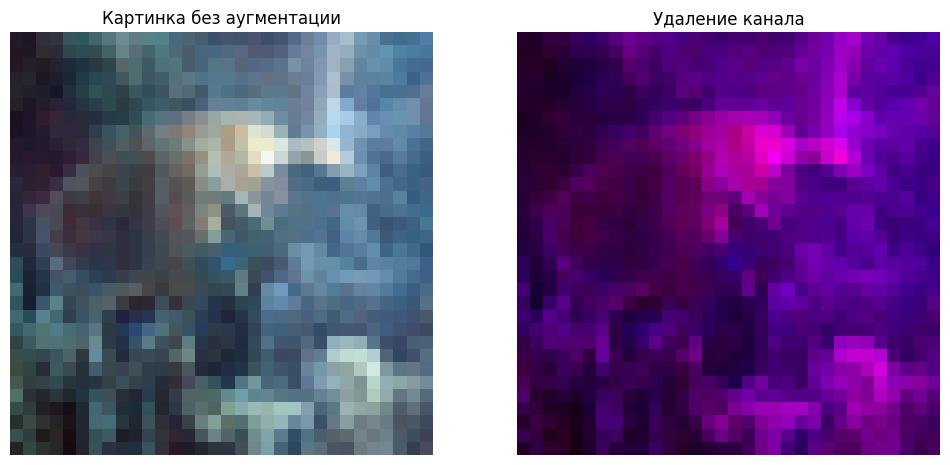

In [17]:
transform = A.Compose([
    A.ChannelDropout(p=1.0),
])
augmented = transform(image=image)
image_augmented = augmented["image"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Картинка без аугментации")
ax[0].axis("off")
ax[1].imshow(image_augmented)
ax[1].set_title("Удаление канала")
ax[1].axis("off")

(-0.5, 31.5, 31.5, -0.5)

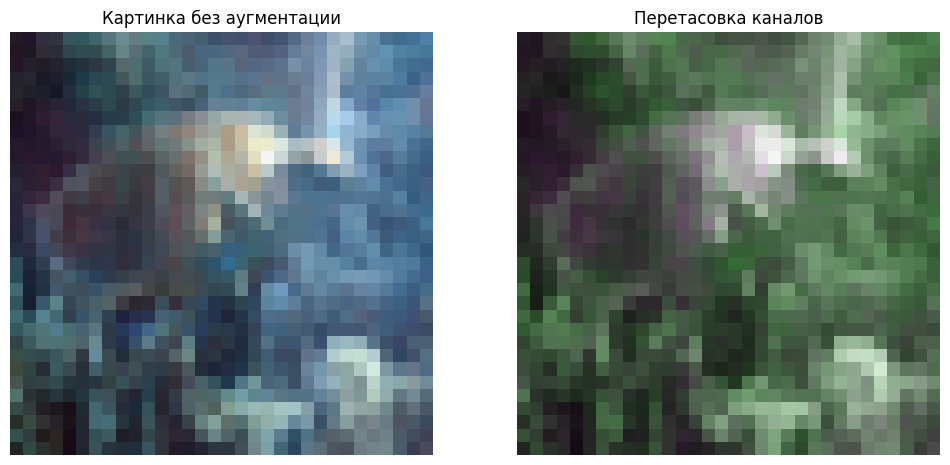

In [18]:
transform = A.Compose([
    A.ChannelShuffle(p=1.0),
])
augmented = transform(image=image)
image_augmented = augmented["image"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Картинка без аугментации")
ax[0].axis("off")
ax[1].imshow(image_augmented)
ax[1].set_title("Перетасовка каналов")
ax[1].axis("off")

(-0.5, 31.5, 31.5, -0.5)

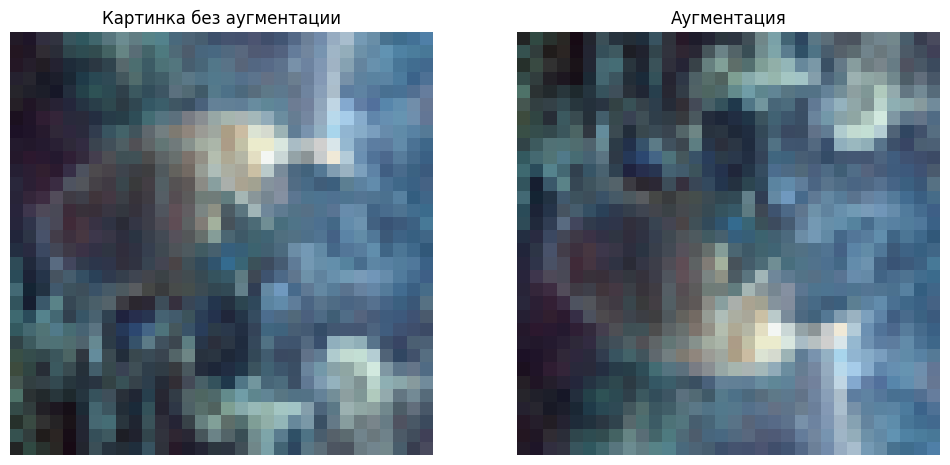

In [19]:
transform = A.Compose([
    A.VerticalFlip(p=1.0),
])

augmented = transform(image=image)
image_augmented = augmented["image"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Картинка без аугментации")
ax[0].axis("off")
ax[1].imshow(image_augmented)
ax[1].set_title("Аугментация")
ax[1].axis("off")

(-0.5, 31.5, 31.5, -0.5)

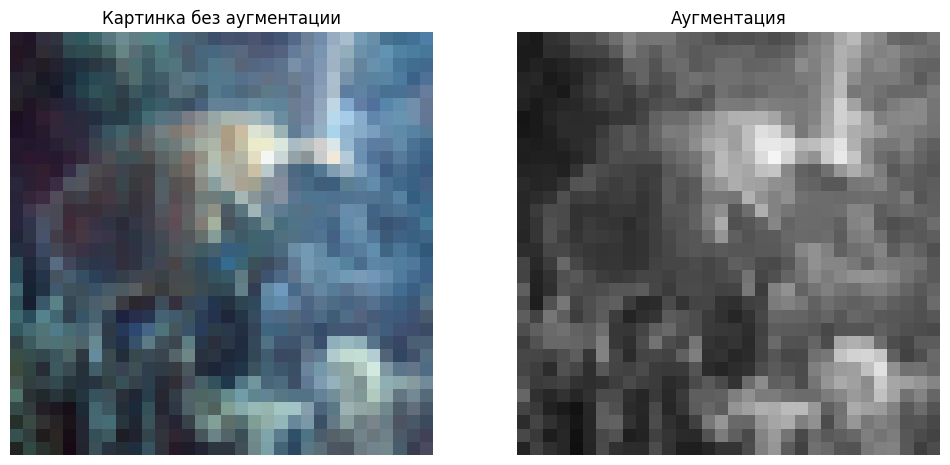

In [20]:
transform = A.Compose([
    A.ToGray(p=1.0),
])

augmented = transform(image=image)
image_augmented = augmented["image"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Картинка без аугментации")
ax[0].axis("off")
ax[1].imshow(image_augmented)
ax[1].set_title("Аугментация")
ax[1].axis("off")

(-0.5, 31.5, 31.5, -0.5)

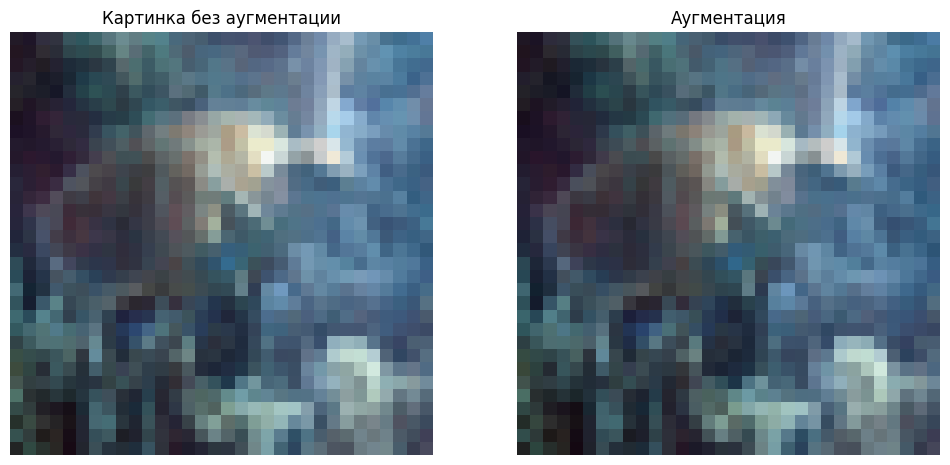

In [21]:
transform = A.Compose([
    A.RandomGamma(gamma_limit=(70, 130), p=1.0),
])

augmented = transform(image=image)
image_augmented = augmented["image"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Картинка без аугментации")
ax[0].axis("off")
ax[1].imshow(image_augmented)
ax[1].set_title("Аугментация")
ax[1].axis("off")

(-0.5, 31.5, 31.5, -0.5)

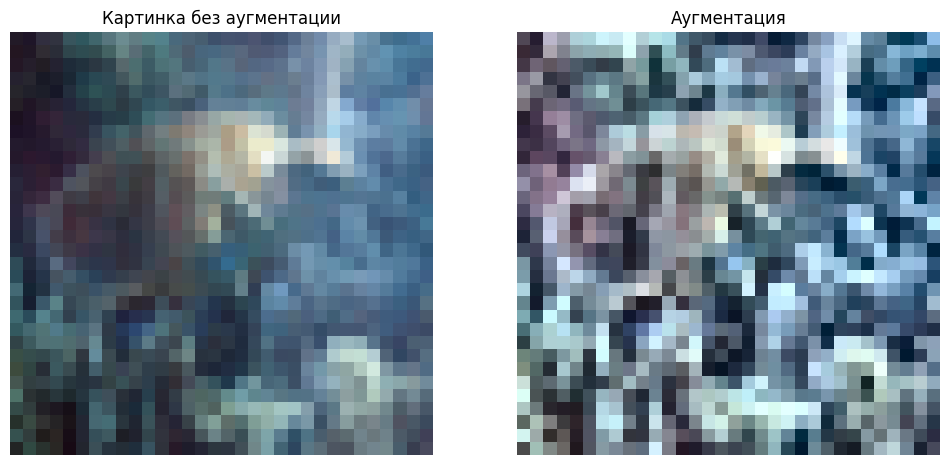

In [22]:
transform = A.Compose([
    A.Compose([A.CLAHE(p=1)]),
])

augmented = transform(image=image)
image_augmented = augmented["image"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Картинка без аугментации")
ax[0].axis("off")
ax[1].imshow(image_augmented)
ax[1].set_title("Аугментация")
ax[1].axis("off")

(-0.5, 31.5, 31.5, -0.5)

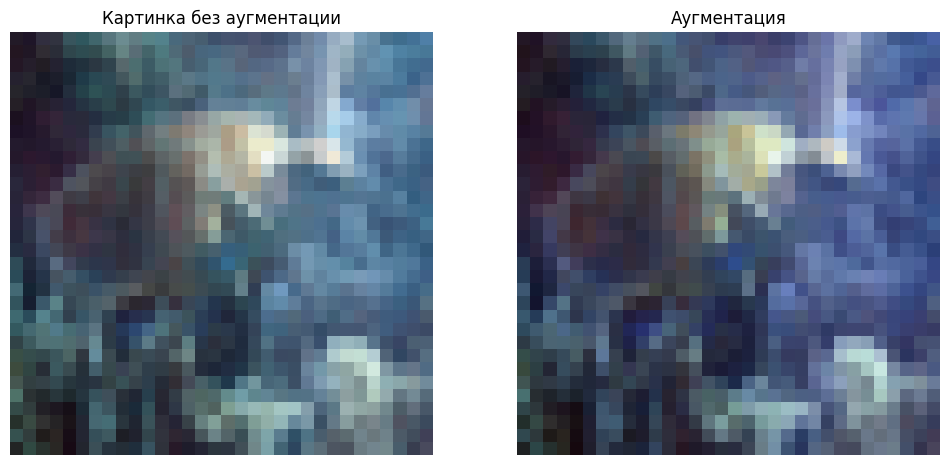

In [23]:

transform = A.Compose([
    A.HueSaturationValue(p=1),
])

augmented = transform(image=image)
image_augmented = augmented["image"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Картинка без аугментации")
ax[0].axis("off")
ax[1].imshow(image_augmented)
ax[1].set_title("Аугментация")
ax[1].axis("off")

(-0.5, 31.5, 31.5, -0.5)

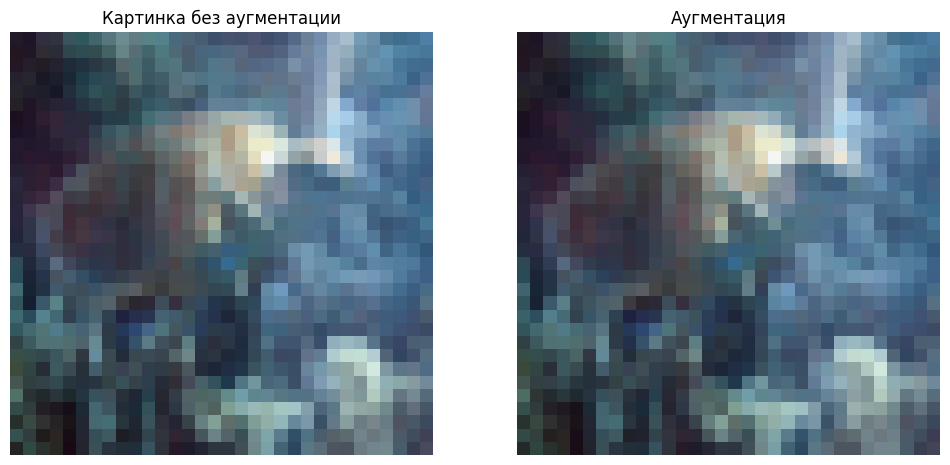

In [24]:

transform = A.Compose([
    A.ElasticTransform(p=1.0),
])

augmented = transform(image=image)
image_augmented = augmented["image"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Картинка без аугментации")
ax[0].axis("off")
ax[1].imshow(image_augmented)
ax[1].set_title("Аугментация")
ax[1].axis("off")

In [218]:
train_df

,filepath,label
0,/kaggle/input/dl-2025-competition-1/data/train...,7
1,/kaggle/input/dl-2025-competition-1/data/train...,7
2,/kaggle/input/dl-2025-competition-1/data/train...,7
3,/kaggle/input/dl-2025-competition-1/data/train...,7
4,/kaggle/input/dl-2025-competition-1/data/train...,7
...,...,...
9505,/kaggle/input/dl-2025-competition-1/data/train...,93
9506,/kaggle/input/dl-2025-competition-1/data/train...,93
9507,/kaggle/input/dl-2025-competition-1/data/train...,93
9508,/kaggle/input/dl-2025-competition-1/data/train...,93


In [37]:
def load_data(data_root):
    data_root = Path(data_root)
    filepaths = []
    labels = []
    
    for class_dir in (data_root / 'train').glob('*'):
        if class_dir.is_dir() and class_dir.name.isdigit():
            for img_path in class_dir.glob('*.png'):
                filepaths.append(str(img_path))
                labels.append(int(class_dir.name))
    
    train_df = pd.DataFrame({'filepath': filepaths, 'label': labels})
    
    # сортировка по числовому имени файла
    test_filepaths = sorted(
        [str(p) for p in (data_root / 'test').glob('*.png')],
        key=lambda x: int(Path(x).stem)  # cортировка по числовой части названия (без .png)
    )
    test_df = pd.DataFrame({'filepath': test_filepaths})
    
    return train_df, test_df

train_df, test_df = load_data('/kaggle/input/dl-2025-competition-1/data/')

max_size = train_df['label'].value_counts().max()

balanced_dfs = []
for class_id in train_df['label'].unique():
    class_df = train_df[train_df['label'] == class_id]
    # дублируем данные 
    balanced_dfs.append(
        resample(class_df, 
                replace=True,  
                n_samples=max_size,  
                random_state=42)
    )

balanced_df = pd.concat(balanced_dfs)

In [9]:
class ImageDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['filepath']

        label = self.df.iloc[idx]['filepath']
        if 'label' in self.df.columns:
            label = self.df.iloc[idx]['label']
        
        # чтение изображения
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # применение аугментаций
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
            
        return image, label


In [11]:
# собираю пайплайн 
train_transform = A.Compose([
    A.Resize(32, 32),  
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.5),
    A.HueSaturationValue(p=0.5),
    A.RandomGamma(p=0.3),
    A.OneOf([
        A.ChannelShuffle(p=0.5),
        A.ChannelDropout(p=0.5),
        A.AutoContrast(p=0.5),
        ], p=0.5),
    A.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(), 
])

val_transform = A.Compose([
    A.Resize(32, 32),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(),
])

In [13]:
train_df, val_df = train_test_split(balanced_df, test_size=0.2,stratify=balanced_df['label'])

train_dataset = ImageDataset(train_df, transform=train_transform)
val_dataset = ImageDataset(val_df, transform=val_transform)
test_dataset = ImageDataset(test_df, transform=val_transform)

train_loader = DataLoader(train_dataset,batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=32,shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [236]:
test_df

,filepath
0,/kaggle/input/dl-2025-competition-1/data/test/...
1,/kaggle/input/dl-2025-competition-1/data/test/...
2,/kaggle/input/dl-2025-competition-1/data/test/...
3,/kaggle/input/dl-2025-competition-1/data/test/...
4,/kaggle/input/dl-2025-competition-1/data/test/...
...,...
3873,/kaggle/input/dl-2025-competition-1/data/test/...
3874,/kaggle/input/dl-2025-competition-1/data/test/...
3875,/kaggle/input/dl-2025-competition-1/data/test/...
3876,/kaggle/input/dl-2025-competition-1/data/test/...


In [35]:
image0 = cv2.imread('/kaggle/input/dl-2025-competition-1/data/test/0.png')
height, width, channels = image.shape
print(height, width, channels)

32 32 3


In [223]:
#базовая модель 

class BaseModel(nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.upscale = nn.Upsample(scale_factor=2, mode='bilinear')
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 64x64 -> 32x32
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 32x32 -> 16x16
            nn.AdaptiveAvgPool2d((6, 6)),  # 16x16 -> 6x6
            nn.Dropout(0.25)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 6 * 6, 128),  # Теперь 64*6*6=2304
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = self.upscale(x)  # 32x32 -> 64x64
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [224]:
num_classes = 100
model = BaseModel(num_classes)
 
batch_size = 32
epochs = 50
patience = 5

optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss(label_smoothing=0.1)

warmup_epochs = 5
warmup_factor = 1./warmup_epochs

best_val_loss = float('inf')
early_stop_counter = 0

train_losses = []
val_losses = []
learning_rates = []

In [225]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Epoch 1/50: 100%|██████████| 375/375 [00:27<00:00, 13.72it/s]


Epoch 1: Train Loss: 4.5807, Val Loss: 4.4498, LR: 0.000200


Epoch 2/50: 100%|██████████| 375/375 [00:21<00:00, 17.62it/s]


Epoch 2: Train Loss: 4.4540, Val Loss: 4.1541, LR: 0.000400


Epoch 3/50: 100%|██████████| 375/375 [00:22<00:00, 16.56it/s]


Epoch 3: Train Loss: 4.3207, Val Loss: 3.9817, LR: 0.000600


Epoch 4/50: 100%|██████████| 375/375 [00:23<00:00, 15.80it/s]


Epoch 4: Train Loss: 4.2159, Val Loss: 3.8997, LR: 0.000800


Epoch 5/50: 100%|██████████| 375/375 [00:21<00:00, 17.21it/s]


Epoch 5: Train Loss: 4.1371, Val Loss: 3.7388, LR: 0.001000


Epoch 6/50: 100%|██████████| 375/375 [00:22<00:00, 16.57it/s]


Epoch 6: Train Loss: 4.1481, Val Loss: 3.7753, LR: 0.001000


Epoch 7/50: 100%|██████████| 375/375 [00:21<00:00, 17.66it/s]


Epoch 7: Train Loss: 4.0722, Val Loss: 3.6853, LR: 0.001000


Epoch 8/50: 100%|██████████| 375/375 [00:22<00:00, 16.71it/s]


Epoch 8: Train Loss: 4.0011, Val Loss: 3.5948, LR: 0.001000


Epoch 9/50: 100%|██████████| 375/375 [00:21<00:00, 17.79it/s]


Epoch 9: Train Loss: 3.9505, Val Loss: 3.5831, LR: 0.001000


Epoch 10/50: 100%|██████████| 375/375 [00:22<00:00, 16.68it/s]


Epoch 10: Train Loss: 3.8939, Val Loss: 3.4716, LR: 0.001000


Epoch 11/50: 100%|██████████| 375/375 [00:21<00:00, 17.68it/s]


Epoch 11: Train Loss: 3.5845, Val Loss: 3.0537, LR: 0.000100


Epoch 12/50: 100%|██████████| 375/375 [00:21<00:00, 17.57it/s]


Epoch 12: Train Loss: 3.5518, Val Loss: 3.0339, LR: 0.000100


Epoch 13/50: 100%|██████████| 375/375 [00:22<00:00, 17.02it/s]


Epoch 13: Train Loss: 3.5253, Val Loss: 2.9926, LR: 0.000100


Epoch 14/50: 100%|██████████| 375/375 [00:23<00:00, 15.87it/s]


Epoch 14: Train Loss: 3.5342, Val Loss: 2.9950, LR: 0.000100


Epoch 15/50: 100%|██████████| 375/375 [00:24<00:00, 15.16it/s]


Epoch 15: Train Loss: 3.5025, Val Loss: 2.9673, LR: 0.000100


Epoch 16/50: 100%|██████████| 375/375 [00:23<00:00, 16.25it/s]


Epoch 16: Train Loss: 3.7334, Val Loss: 3.2870, LR: 0.000010


Epoch 17/50: 100%|██████████| 375/375 [00:23<00:00, 15.96it/s]


Epoch 17: Train Loss: 3.7356, Val Loss: 3.2981, LR: 0.000010


Epoch 18/50: 100%|██████████| 375/375 [00:20<00:00, 17.87it/s]


Epoch 18: Train Loss: 3.7201, Val Loss: 3.2984, LR: 0.000010


Epoch 19/50: 100%|██████████| 375/375 [00:22<00:00, 16.82it/s]


Epoch 19: Train Loss: 3.7333, Val Loss: 3.3045, LR: 0.000010


Epoch 20/50: 100%|██████████| 375/375 [00:21<00:00, 17.62it/s]


Epoch 20: Train Loss: 3.7175, Val Loss: 3.3019, LR: 0.000010
Early stopping at epoch 20


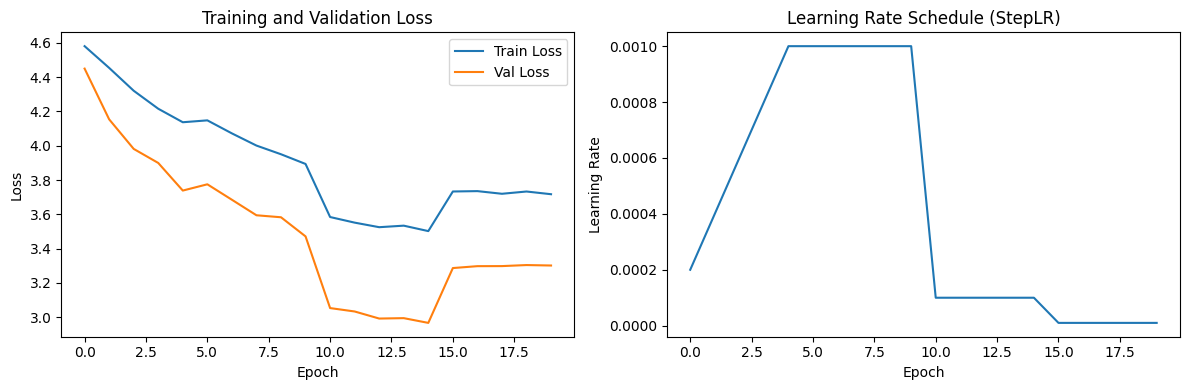

In [227]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    # вормап
    if epoch < warmup_epochs:
        lr_scale = warmup_factor * (epoch + 1)
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr_scale * 1e-3
    
    
    current_criterion = criterion1 if epoch % 10 < 5 else criterion2
    
    # Обучение
    for inputs, label in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = current_criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    # Валидация
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += current_criterion(outputs, labels).item()

    train_loss = running_loss / len(train_loader)
    val_loss = val_loss / len(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, LR: {optimizer.param_groups[0]["lr"]:.6f}')

    if epoch >= warmup_epochs:
        scheduler.step()
    # ранняя остановка
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule (StepLR)')
plt.tight_layout()
plt.show()

In [228]:
model.load_state_dict(torch.load('best_model.pth'))

/tmp/ipykernel_31/1559688700.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


<All keys matched successfully>

In [230]:
from sklearn.metrics import accuracy_score, classification_report

def calculate_validation_accuracy(model, val_loader, device):
    model.eval()  
    true_labels = []
    pred_labels = []
    
    with torch.no_grad(): 
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())
    
    # Вычисляем accuracy
    accuracy = accuracy_score(true_labels, pred_labels)
    
    print(classification_report(true_labels, pred_labels))

    return accuracy


val_accuracy = calculate_validation_accuracy(model, val_loader, device)
print(f'Validation Accuracy: {val_accuracy:.4f}')

              precision    recall  f1-score   support

           0       0.10      0.07      0.08        30
           1       0.20      0.57      0.30        30
           2       0.44      0.60      0.51        30
           3       0.36      0.53      0.43        30
           4       0.35      0.23      0.28        30
           5       0.26      0.53      0.35        30
           6       0.11      0.13      0.12        30
           7       0.00      0.00      0.00        30
           8       0.23      0.27      0.25        30
           9       0.30      0.27      0.28        30
          10       0.27      0.40      0.32        30
          11       0.26      0.33      0.29        30
          12       0.25      0.33      0.29        30
          13       0.31      0.43      0.36        30
          14       0.49      0.77      0.60        30
          15       0.32      0.23      0.27        30
          16       0.11      0.07      0.08        30
          17       0.28    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
## it works
model.eval()
predictions = []
filenames = []

with torch.no_grad():
    for images, path  in test_loader: 
        images = images.to(device).float()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        predictions.extend(preds.cpu().numpy())
        filenames.extend(path)

results = pd.DataFrame({
    'filename': filenames,
    'prediction': predictions
})
results.head()

,filename,prediction
0,/kaggle/input/dl-2025-competition-1/data/test/...,38
1,/kaggle/input/dl-2025-competition-1/data/test/...,62
2,/kaggle/input/dl-2025-competition-1/data/test/...,70
3,/kaggle/input/dl-2025-competition-1/data/test/...,89
4,/kaggle/input/dl-2025-competition-1/data/test/...,84


In [258]:
results.to_csv('submission_best1.csv', index=True, index_label = 'id', na_rep="0")

Попробую обучить модель с простой аугментацией

In [49]:
train_transform = A.Compose([
    A.Resize(32, 32),  
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(), 
])

val_transform = A.Compose([
    A.Resize(32, 32),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(),
])

train_dataset = ImageDataset(train_df, transform=train_transform)
val_dataset = ImageDataset(val_df, transform=val_transform)
test_dataset = ImageDataset(test_df, transform=val_transform)

train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=32,shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

Epoch 1/50: 100%|██████████| 191/191 [00:36<00:00,  5.29it/s]


Epoch 1: Train Loss: 4.5435, Val Loss: 4.3787, LR: 0.000200


Epoch 2/50: 100%|██████████| 191/191 [00:10<00:00, 17.66it/s]


Epoch 2: Train Loss: 4.3146, Val Loss: 4.1219, LR: 0.000400


Epoch 3/50: 100%|██████████| 191/191 [00:10<00:00, 18.74it/s]


Epoch 3: Train Loss: 4.1351, Val Loss: 3.9136, LR: 0.000600


Epoch 4/50: 100%|██████████| 191/191 [00:10<00:00, 18.43it/s]


Epoch 4: Train Loss: 3.9819, Val Loss: 3.7607, LR: 0.000800


Epoch 5/50: 100%|██████████| 191/191 [00:11<00:00, 17.14it/s]


Epoch 5: Train Loss: 3.8710, Val Loss: 3.6996, LR: 0.001000


Epoch 6/50: 100%|██████████| 191/191 [00:11<00:00, 16.29it/s]


Epoch 6: Train Loss: 3.9087, Val Loss: 3.7720, LR: 0.001000


Epoch 7/50: 100%|██████████| 191/191 [00:10<00:00, 17.91it/s]


Epoch 7: Train Loss: 3.8330, Val Loss: 3.6945, LR: 0.001000


Epoch 8/50: 100%|██████████| 191/191 [00:10<00:00, 17.58it/s]


Epoch 8: Train Loss: 3.7227, Val Loss: 3.6409, LR: 0.000100


Epoch 9/50: 100%|██████████| 191/191 [00:10<00:00, 17.51it/s]


Epoch 9: Train Loss: 3.7038, Val Loss: 3.6212, LR: 0.000100


Epoch 10/50: 100%|██████████| 191/191 [00:10<00:00, 17.70it/s]


Epoch 10: Train Loss: 3.6779, Val Loss: 3.6161, LR: 0.000010


Epoch 11/50: 100%|██████████| 191/191 [00:10<00:00, 18.77it/s]


Epoch 11: Train Loss: 3.4586, Val Loss: 3.3816, LR: 0.000010


Epoch 12/50: 100%|██████████| 191/191 [00:10<00:00, 18.70it/s]


Epoch 12: Train Loss: 3.4390, Val Loss: 3.3800, LR: 0.000001


Epoch 13/50: 100%|██████████| 191/191 [00:10<00:00, 18.29it/s]


Epoch 13: Train Loss: 3.4354, Val Loss: 3.3786, LR: 0.000001


Epoch 14/50: 100%|██████████| 191/191 [00:11<00:00, 16.18it/s]


Epoch 14: Train Loss: 3.4363, Val Loss: 3.3785, LR: 0.000000


Epoch 15/50: 100%|██████████| 191/191 [00:11<00:00, 16.78it/s]


Epoch 15: Train Loss: 3.4364, Val Loss: 3.3784, LR: 0.000000


Epoch 16/50: 100%|██████████| 191/191 [00:10<00:00, 18.09it/s]


Epoch 16: Train Loss: 3.6818, Val Loss: 3.6062, LR: 0.000000


Epoch 17/50: 100%|██████████| 191/191 [00:10<00:00, 18.33it/s]


Epoch 17: Train Loss: 3.6762, Val Loss: 3.6062, LR: 0.000000


Epoch 18/50: 100%|██████████| 191/191 [00:10<00:00, 18.41it/s]


Epoch 18: Train Loss: 3.6898, Val Loss: 3.6062, LR: 0.000000


Epoch 19/50: 100%|██████████| 191/191 [00:11<00:00, 16.19it/s]


Epoch 19: Train Loss: 3.6710, Val Loss: 3.6062, LR: 0.000000


Epoch 20/50: 100%|██████████| 191/191 [00:11<00:00, 16.64it/s]


Epoch 20: Train Loss: 3.6911, Val Loss: 3.6062, LR: 0.000000
Early stopping at epoch 20


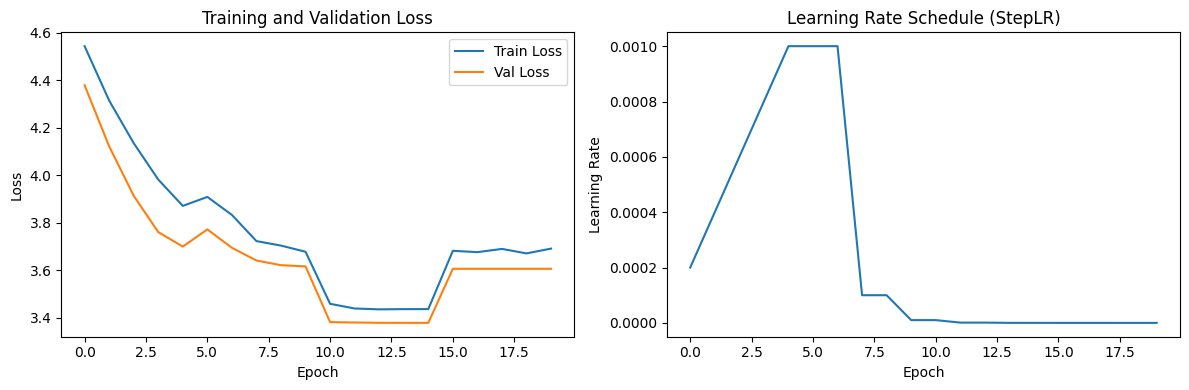

In [50]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    # вормап
    if epoch < warmup_epochs:
        lr_scale = warmup_factor * (epoch + 1)
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr_scale * 1e-3
    
    
    current_criterion = criterion1 if epoch % 10 < 5 else criterion2
    
    # Обучение
    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = current_criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    # Валидация
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += current_criterion(outputs, labels).item()

    train_loss = running_loss / len(train_loader)
    val_loss = val_loss / len(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, LR: {optimizer.param_groups[0]["lr"]:.6f}')

    if epoch >= warmup_epochs:
        scheduler.step()
    # ранняя остановка
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule (StepLR)')
plt.tight_layout()
plt.show()

In [117]:
model.load_state_dict(torch.load('best_model.pth'))

/tmp/ipykernel_31/1559688700.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


<All keys matched successfully>

In [259]:
model.eval()  # Переводим модель в режим оценки
predictions = []
filenames = []

with torch.no_grad():
    for images, batch_filenames in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        predictions.extend(preds.cpu().numpy())
        filenames.extend(batch_filenames)

# Создаем DataFrame с результатами
results = pd.DataFrame({
    'target': predictions
})

In [ ]:
results.to_csv('submission_noaug.csv', index=True, index_label = 'id', na_rep="0")

In [119]:
def calculate_validation_accuracy(model, val_loader, device):
    model.eval()  
    true_labels = []
    pred_labels = []
    
    with torch.no_grad(): 
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())
    
    # Вычисляем accuracy
    accuracy = accuracy_score(true_labels, pred_labels)
    
    print(classification_report(true_labels, pred_labels))

    return accuracy


val_accuracy = calculate_validation_accuracy(model, val_loader, device)
print(f'Validation Accuracy: {val_accuracy:.4f}')

              precision    recall  f1-score   support

           0       0.19      0.20      0.19        30
           1       0.26      0.77      0.39        30
           2       0.32      0.63      0.42        30
           3       0.28      0.43      0.34        30
           4       0.21      0.20      0.21        30
           5       0.34      0.57      0.42        30
           6       0.14      0.23      0.18        30
           7       0.00      0.00      0.00        30
           8       0.25      0.43      0.32        30
           9       0.30      0.27      0.28        30
          10       0.20      0.33      0.25        30
          11       0.28      0.17      0.21        30
          12       0.37      0.33      0.35        30
          13       0.40      0.33      0.36        30
          14       0.44      0.83      0.57        30
          15       0.26      0.17      0.20        30
          16       0.25      0.13      0.17        30
          17       0.36    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Для обычной модели лучше вариант с аугментацией

## Предобученная модель 

In [113]:
import torchvision.models as models

In [4]:
def load_data(data_root):
    data_root = Path(data_root)
    filepaths = []
    labels = []
    
    for class_dir in (data_root / 'train').glob('*'):
        if class_dir.is_dir() and class_dir.name.isdigit():
            for img_path in class_dir.glob('*.png'):
                filepaths.append(str(img_path))
                labels.append(int(class_dir.name))
    
    train_df = pd.DataFrame({'filepath': filepaths, 'label': labels})
    
    # сортировка по числовому имени файла
    test_filepaths = sorted(
        [str(p) for p in (data_root / 'test').glob('*.png')],
        key=lambda x: int(Path(x).stem)  # cортировка по числовой части названия (без .png)
    )
    test_df = pd.DataFrame({'filepath': test_filepaths})
    
    return train_df, test_df

train_df, test_df = load_data('/kaggle/input/dl-2025-competition-1/data/')

In [260]:
# собираю пайплайн 
train_transform = A.Compose([
    A.Resize(224, 224),  
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.5),
    A.HueSaturationValue(p=0.5),
    A.RandomGamma(p=0.3),
    A.OneOf([
        A.ChannelShuffle(p=0.5),
        A.ChannelDropout(p=0.5),
        A.AutoContrast(p=0.5),
    ], p=0.5),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],  
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(224, 224),  # увеличиваем валидационные данные тоже
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(),
])

In [316]:
model = models.resnet18(pretrained=True)

num_classes = len(train_df['label'].unique())
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

In [290]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(

def evaluate(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    loss = running_loss / len(data_loader)
    accuracy = correct / total
    return loss, accuracy

for epoch in range(50): 
    model.train()
    train_loss, train_acc = 0.0, 0.0
    
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_acc += (preds == labels).sum().item()
    
    train_loss /= len(train_loader)
    train_acc /= len(train_loader.dataset)
    
    # Валидация
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    
    print(
        f"Epoch {epoch + 1}/10 | "
        f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
        f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}"
    )

100%|██████████| 375/375 [00:31<00:00, 11.72it/s]


Epoch 1/10 | Train Loss: 4.2798, Acc: 0.0732 | Val Loss: 4.4650, Acc: 0.1017


100%|██████████| 375/375 [00:32<00:00, 11.67it/s]


Epoch 2/10 | Train Loss: 3.6972, Acc: 0.1435 | Val Loss: 3.1926, Acc: 0.2140


100%|██████████| 375/375 [00:31<00:00, 11.80it/s]


Epoch 3/10 | Train Loss: 3.3148, Acc: 0.1981 | Val Loss: 3.0093, Acc: 0.2593


100%|██████████| 375/375 [00:32<00:00, 11.46it/s]


Epoch 4/10 | Train Loss: 3.2044, Acc: 0.2174 | Val Loss: 2.7628, Acc: 0.2957


100%|██████████| 375/375 [00:32<00:00, 11.71it/s]


Epoch 5/10 | Train Loss: 2.9233, Acc: 0.2731 | Val Loss: 2.7364, Acc: 0.3123


100%|██████████| 375/375 [00:32<00:00, 11.67it/s]


Epoch 6/10 | Train Loss: 2.7698, Acc: 0.3043 | Val Loss: 2.3657, Acc: 0.3923


100%|██████████| 375/375 [00:32<00:00, 11.53it/s]


Epoch 7/10 | Train Loss: 2.6628, Acc: 0.3261 | Val Loss: 2.2111, Acc: 0.4320


100%|██████████| 375/375 [00:32<00:00, 11.71it/s]


Epoch 8/10 | Train Loss: 2.7409, Acc: 0.3168 | Val Loss: 2.3140, Acc: 0.4093


100%|██████████| 375/375 [00:32<00:00, 11.68it/s]


Epoch 9/10 | Train Loss: 2.4252, Acc: 0.3760 | Val Loss: 2.2388, Acc: 0.4410


100%|██████████| 375/375 [00:31<00:00, 11.83it/s]


Epoch 10/10 | Train Loss: 2.2503, Acc: 0.4205 | Val Loss: 1.9917, Acc: 0.4823


100%|██████████| 375/375 [00:31<00:00, 11.93it/s]


Epoch 11/10 | Train Loss: 2.1096, Acc: 0.4537 | Val Loss: 1.8269, Acc: 0.5273


100%|██████████| 375/375 [00:33<00:00, 11.30it/s]


Epoch 12/10 | Train Loss: 1.9311, Acc: 0.4898 | Val Loss: 2.1829, Acc: 0.4453


100%|██████████| 375/375 [00:33<00:00, 11.18it/s]


Epoch 13/10 | Train Loss: 1.9553, Acc: 0.4933 | Val Loss: 1.6905, Acc: 0.5573


100%|██████████| 375/375 [00:32<00:00, 11.55it/s]


Epoch 14/10 | Train Loss: 1.7943, Acc: 0.5275 | Val Loss: 1.5182, Acc: 0.6203


100%|██████████| 375/375 [00:33<00:00, 11.13it/s]


Epoch 15/10 | Train Loss: 1.5949, Acc: 0.5798 | Val Loss: 1.5013, Acc: 0.6130


100%|██████████| 375/375 [00:32<00:00, 11.70it/s]


Epoch 16/10 | Train Loss: 1.5088, Acc: 0.6058 | Val Loss: 1.4273, Acc: 0.6620


100%|██████████| 375/375 [00:33<00:00, 11.31it/s]


Epoch 17/10 | Train Loss: 1.4390, Acc: 0.6174 | Val Loss: 1.3193, Acc: 0.6707


100%|██████████| 375/375 [00:32<00:00, 11.43it/s]


Epoch 18/10 | Train Loss: 1.3953, Acc: 0.6323 | Val Loss: 1.3207, Acc: 0.6760


100%|██████████| 375/375 [00:32<00:00, 11.61it/s]


Epoch 19/10 | Train Loss: 1.3755, Acc: 0.6359 | Val Loss: 1.3457, Acc: 0.6810


100%|██████████| 375/375 [00:32<00:00, 11.50it/s]


Epoch 20/10 | Train Loss: 1.2522, Acc: 0.6647 | Val Loss: 1.2595, Acc: 0.7127


100%|██████████| 375/375 [00:32<00:00, 11.48it/s]


Epoch 21/10 | Train Loss: 1.1844, Acc: 0.6838 | Val Loss: 1.2233, Acc: 0.7237


100%|██████████| 375/375 [00:32<00:00, 11.67it/s]


Epoch 22/10 | Train Loss: 1.0916, Acc: 0.7123 | Val Loss: 1.4819, Acc: 0.6710


100%|██████████| 375/375 [00:32<00:00, 11.46it/s]


Epoch 23/10 | Train Loss: 1.0922, Acc: 0.7122 | Val Loss: 1.2071, Acc: 0.7313


100%|██████████| 375/375 [00:32<00:00, 11.69it/s]


Epoch 24/10 | Train Loss: 1.0176, Acc: 0.7268 | Val Loss: 1.1692, Acc: 0.7403


100%|██████████| 375/375 [00:31<00:00, 11.93it/s]


Epoch 25/10 | Train Loss: 0.9832, Acc: 0.7392 | Val Loss: 1.1008, Acc: 0.7557


100%|██████████| 375/375 [00:31<00:00, 12.01it/s]


Epoch 26/10 | Train Loss: 0.9399, Acc: 0.7498 | Val Loss: 1.2118, Acc: 0.7353


100%|██████████| 375/375 [00:30<00:00, 12.13it/s]


Epoch 27/10 | Train Loss: 0.8478, Acc: 0.7758 | Val Loss: 1.1525, Acc: 0.7497


100%|██████████| 375/375 [00:31<00:00, 11.97it/s]


Epoch 28/10 | Train Loss: 0.8333, Acc: 0.7786 | Val Loss: 1.1564, Acc: 0.7633


100%|██████████| 375/375 [00:31<00:00, 11.96it/s]


Epoch 29/10 | Train Loss: 0.7961, Acc: 0.7867 | Val Loss: 1.0997, Acc: 0.7720


100%|██████████| 375/375 [00:31<00:00, 11.90it/s]


Epoch 30/10 | Train Loss: 0.7718, Acc: 0.7933 | Val Loss: 1.1522, Acc: 0.7660


100%|██████████| 375/375 [00:31<00:00, 11.76it/s]


Epoch 31/10 | Train Loss: 0.8771, Acc: 0.7658 | Val Loss: 1.1636, Acc: 0.7627


100%|██████████| 375/375 [00:32<00:00, 11.54it/s]


Epoch 32/10 | Train Loss: 0.7157, Acc: 0.8029 | Val Loss: 1.1072, Acc: 0.7810


100%|██████████| 375/375 [00:32<00:00, 11.40it/s]


Epoch 33/10 | Train Loss: 0.6307, Acc: 0.8307 | Val Loss: 1.1821, Acc: 0.7673


100%|██████████| 375/375 [00:33<00:00, 11.23it/s]


Epoch 34/10 | Train Loss: 0.6601, Acc: 0.8139 | Val Loss: 1.0716, Acc: 0.7873


100%|██████████| 375/375 [00:33<00:00, 11.32it/s]


Epoch 35/10 | Train Loss: 0.6103, Acc: 0.8309 | Val Loss: 1.0960, Acc: 0.7957


100%|██████████| 375/375 [00:32<00:00, 11.67it/s]


Epoch 36/10 | Train Loss: 0.6403, Acc: 0.8278 | Val Loss: 1.1401, Acc: 0.7883


100%|██████████| 375/375 [00:32<00:00, 11.71it/s]


Epoch 37/10 | Train Loss: 0.7113, Acc: 0.8078 | Val Loss: 1.1605, Acc: 0.7753


100%|██████████| 375/375 [00:31<00:00, 11.85it/s]


Epoch 38/10 | Train Loss: 0.7090, Acc: 0.8064 | Val Loss: 1.0906, Acc: 0.7877


100%|██████████| 375/375 [00:31<00:00, 11.79it/s]


Epoch 39/10 | Train Loss: 0.5425, Acc: 0.8498 | Val Loss: 1.1398, Acc: 0.7907


100%|██████████| 375/375 [00:31<00:00, 12.07it/s]


Epoch 40/10 | Train Loss: 0.5082, Acc: 0.8598 | Val Loss: 1.1023, Acc: 0.8013


100%|██████████| 375/375 [00:30<00:00, 12.20it/s]


Epoch 41/10 | Train Loss: 0.4937, Acc: 0.8644 | Val Loss: 1.0755, Acc: 0.8020


100%|██████████| 375/375 [00:31<00:00, 12.09it/s]


Epoch 42/10 | Train Loss: 0.4910, Acc: 0.8658 | Val Loss: 1.1149, Acc: 0.8087


100%|██████████| 375/375 [00:30<00:00, 12.34it/s]


Epoch 43/10 | Train Loss: 0.4666, Acc: 0.8685 | Val Loss: 1.1089, Acc: 0.8033


100%|██████████| 375/375 [00:31<00:00, 11.89it/s]


Epoch 44/10 | Train Loss: 0.4687, Acc: 0.8748 | Val Loss: 1.1777, Acc: 0.7857


100%|██████████| 375/375 [00:30<00:00, 12.31it/s]


Epoch 45/10 | Train Loss: 0.4828, Acc: 0.8662 | Val Loss: 1.1185, Acc: 0.8000


100%|██████████| 375/375 [00:30<00:00, 12.16it/s]


Epoch 46/10 | Train Loss: 0.4829, Acc: 0.8670 | Val Loss: 1.1506, Acc: 0.8063


100%|██████████| 375/375 [00:30<00:00, 12.29it/s]


Epoch 47/10 | Train Loss: 0.4662, Acc: 0.8691 | Val Loss: 1.1308, Acc: 0.8053


100%|██████████| 375/375 [00:32<00:00, 11.53it/s]


Epoch 48/10 | Train Loss: 0.4530, Acc: 0.8761 | Val Loss: 1.3588, Acc: 0.7727


100%|██████████| 375/375 [00:31<00:00, 11.78it/s]


Epoch 49/10 | Train Loss: 0.4355, Acc: 0.8771 | Val Loss: 1.1487, Acc: 0.8077


100%|██████████| 375/375 [00:30<00:00, 12.29it/s]


Epoch 50/10 | Train Loss: 0.3929, Acc: 0.8899 | Val Loss: 1.1737, Acc: 0.8013


In [291]:
def get_test_predictions(model, test_loader):
    model.eval()
    filenames = []
    preds = []
    
    with torch.no_grad():
        for images, batch_filenames in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, batch_preds = torch.max(outputs, 1)
            
            filenames.extend(batch_filenames)
            preds.extend(batch_preds.cpu().numpy())
    
    df = pd.DataFrame({
        'full_path': filenames,
        'target': preds
    })
    df['file_id'] = df['full_path'].str.extract(r'(\d+)').astype(int)
    # Сортируем по числовому ID 
    df = df.sort_values('file_id').drop('file_id', axis=1)
    
    return df

Когда 50 эпох, модель переобучается. 0.29 на лидерборде на 20 эпохах

In [292]:
test_predictions = get_test_predictions(model, test_loader)
test_predictions = test_predictions.sort_index()

In [294]:
preds = test_predictions['target']
preds.to_csv('pre_predictions2', index=True, index_label = 'id', na_rep="0")

Попробую более сложный пайплайн аугментации

In [5]:
# собираю пайплайн 
train_transform_adv = A.Compose([
    A.Resize(224, 224),  
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.5),
    A.HueSaturationValue(p=0.5),
    A.RandomGamma(p=0.3),
    A.ChannelShuffle(p=0.5),
    A.ChannelDropout(p=0.5),
    A.AutoContrast(p=0.5),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],  
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(),
])

val_transform_adv = A.Compose([
    A.Resize(224, 224),  # Увеличиваем валидационные данные тоже
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(),
])

In [12]:

train_df_final, val_df_final = train_test_split(balanced_df, test_size=0.2)

train_dataset = ImageDataset(train_df_final, transform=train_transform_adv)
val_dataset = ImageDataset(val_df_final, transform=val_transform_adv)
test_dataset = ImageDataset(test_df, transform=val_transform_adv)

train_loader = DataLoader(train_dataset,batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=32,shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [17]:
model1 = models.resnet18(pretrained=True)

num_classes = len(train_df['label'].unique())
model1.fc = nn.Linear(model1.fc.in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = model1.to(device)

In [26]:
optimizer = optim.Adam(model1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

def evaluate(model1, data_loader, criterion):
    model1.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model1(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    loss = running_loss / len(data_loader)
    accuracy = correct / total
    return loss, accuracy

for epoch in range(10): 
    model1.train()
    train_loss, train_acc = 0.0, 0.0
    
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model1(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_acc += (preds == labels).sum().item()
    
    train_loss /= len(train_loader)
    train_acc /= len(train_loader.dataset)
    
    # Валидация
    val_loss, val_acc = evaluate(model1, val_loader, criterion)
    
    print(
        f"Epoch {epoch + 1}/10 | "
        f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
        f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}"
    )

100%|██████████| 375/375 [01:08<00:00,  5.51it/s]


Epoch 1/10 | Train Loss: 0.5562, Acc: 0.8471 | Val Loss: 0.9525, Acc: 0.8033


100%|██████████| 375/375 [01:07<00:00,  5.54it/s]


Epoch 2/10 | Train Loss: 0.4799, Acc: 0.8732 | Val Loss: 0.8369, Acc: 0.8237


100%|██████████| 375/375 [01:08<00:00,  5.45it/s]


Epoch 3/10 | Train Loss: 0.4275, Acc: 0.8827 | Val Loss: 0.9914, Acc: 0.8050


100%|██████████| 375/375 [01:08<00:00,  5.49it/s]


Epoch 4/10 | Train Loss: 0.3916, Acc: 0.8916 | Val Loss: 0.9560, Acc: 0.8157


100%|██████████| 375/375 [01:08<00:00,  5.51it/s]


Epoch 5/10 | Train Loss: 0.3699, Acc: 0.8988 | Val Loss: 0.9500, Acc: 0.8200


100%|██████████| 375/375 [01:08<00:00,  5.45it/s]


Epoch 6/10 | Train Loss: 0.3160, Acc: 0.9123 | Val Loss: 0.9479, Acc: 0.8147


100%|██████████| 375/375 [01:08<00:00,  5.46it/s]


Epoch 7/10 | Train Loss: 0.3194, Acc: 0.9128 | Val Loss: 0.9167, Acc: 0.8277


100%|██████████| 375/375 [01:08<00:00,  5.50it/s]


Epoch 8/10 | Train Loss: 0.2928, Acc: 0.9190 | Val Loss: 1.0007, Acc: 0.8260


100%|██████████| 375/375 [01:08<00:00,  5.47it/s]


Epoch 9/10 | Train Loss: 0.2659, Acc: 0.9261 | Val Loss: 0.9387, Acc: 0.8253


100%|██████████| 375/375 [01:07<00:00,  5.52it/s]


Epoch 10/10 | Train Loss: 0.2672, Acc: 0.9250 | Val Loss: 0.9758, Acc: 0.8170


In [27]:
def get_test_predictions(model1, test_loader):
    model1.eval()
    filenames = []
    preds = []
    
    with torch.no_grad():
        for images, batch_filenames in test_loader:
            images = images.to(device)
            outputs = model1(images)
            _, batch_preds = torch.max(outputs, 1)
            
            filenames.extend(batch_filenames)
            preds.extend(batch_preds.cpu().numpy())
    
    df = pd.DataFrame({
        'full_path': filenames,
        'target': preds
    })
    df['file_id'] = df['full_path'].str.extract(r'(\d+)').astype(int)
    # Сортируем по числовому ID 
    df = df.sort_values('file_id').drop('file_id', axis=1)
    
    return df

In [28]:
test_predictions = get_test_predictions(model1, test_loader)
test_predictions = test_predictions.sort_index()

In [29]:
preds = test_predictions['target']
preds.to_csv('pre_predictions3', index=True, index_label = 'id', na_rep="0")

## Выбиваем скор на каггле

In [96]:
train_transform = A.Compose([
    A.Resize(224, 224),  
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],  
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(224, 224),  # увеличиваем валидационные данные тоже
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(),
])

In [38]:
train_df_final, val_df_final = train_test_split(balanced_df, test_size=0.2)

train_dataset = ImageDataset(train_df_final, transform=train_transform)
val_dataset = ImageDataset(val_df_final, transform=val_transform)
test_dataset = ImageDataset(test_df, transform=val_transform)

train_loader = DataLoader(train_dataset,batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=32,shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# модель, которая выбивает скор на каггле
model_noaug = models.resnet18(pretrained=True)

num_classes = len(train_df['label'].unique())
model1.fc = nn.Linear(model_noaug.fc.in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_noaug = model_noaug.to(device)

In [76]:
num_classes = 100
model_noaug = model_noaug
 
batch_size = 32
epochs = 10
patience = 2

scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

criterion1 = nn.CrossEntropyLoss()



best_val_loss = float('inf')
early_stop_counter = 0

train_losses = []
val_losses = []
learning_rates = []

In [77]:
# обучение модели, которая выбивает скор на каггле
optimizer = optim.Adam(model_noaug.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

def evaluate(model_noaug, data_loader, criterion):
    model_noaug.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    current_criterion = criterion1
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_noaug(images)
            loss = current_criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    loss = running_loss / len(data_loader)
    accuracy = correct / total
    return loss, accuracy

for epoch in range(10): 
    model_noaug.train()
    train_loss, train_acc = 0.0, 0.0
    
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_noaug(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_acc += (preds == labels).sum().item()
    
    train_loss /= len(train_loader)
    train_acc /= len(train_loader.dataset)
    train_losses.append(loss)
    
    # Валидация
    val_loss, val_acc = evaluate(model_noaug, val_loader, criterion)
    scheduler.step(val_loss)
    
    print(
        f"Epoch {epoch + 1}/10 | "
        f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
        f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}"
    )

    if epoch >= warmup_epochs:
        scheduler.step()
    # ранняя остановка
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model_noaug.state_dict(), 'best_model.pth')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break


100%|██████████| 375/375 [01:00<00:00,  6.25it/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pyto

Epoch 1/10 | Train Loss: 0.2488, Acc: 0.9272 | Val Loss: 0.7693, Acc: 0.8587


100%|██████████| 375/375 [00:59<00:00,  6.33it/s]


Epoch 2/10 | Train Loss: 0.1924, Acc: 0.9435 | Val Loss: 0.7753, Acc: 0.8577


100%|██████████| 375/375 [01:00<00:00,  6.24it/s]


Epoch 3/10 | Train Loss: 0.2153, Acc: 0.9357 | Val Loss: 0.8925, Acc: 0.8397
Early stopping at epoch 3


In [78]:
def get_test_predictions(model_noaug, test_loader):
    model_noaug.eval()
    filenames = []
    preds = []
    
    with torch.no_grad():
        for images, batch_filenames in test_loader:
            images = images.to(device)
            outputs = model_noaug(images)
            _, batch_preds = torch.max(outputs, 1)
            
            filenames.extend(batch_filenames)
            preds.extend(batch_preds.cpu().numpy())
    
    df = pd.DataFrame({
        'full_path': filenames,
        'target': preds
    })
    df['file_id'] = df['full_path'].str.extract(r'(\d+)').astype(int)
    # Сортируем по числовому ID 
    df = df.sort_values('file_id').drop('file_id', axis=1)
    
    return df

In [79]:
test_predictions = get_test_predictions(model_noaug, test_loader)
test_predictions = test_predictions.sort_index()

In [80]:
preds = test_predictions['target']
preds.to_csv('pre_predictions5', index=True, index_label = 'id', na_rep="0")

## Генерация картинок

In [75]:
# генератор DCGAN (224x224)
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super().__init__()
        self.init_size = 224 // 32  # =7
        self.l1 = nn.Linear(latent_dim, 512 * self.init_size**2)
        
        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(512),
            nn.Upsample(scale_factor=2),  
            nn.Conv2d(512, 256, 3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            
            nn.Upsample(scale_factor=2),  
            nn.Conv2d(256, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            nn.Upsample(scale_factor=2),  
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            nn.Upsample(scale_factor=2), 
            nn.Conv2d(64, 32, 3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.Upsample(scale_factor=2),  
            nn.Conv2d(32, 3, 3, stride=1, padding=1),
            nn.Tanh()
        )
    
    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 512, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

In [76]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            # Input: 3x224x224
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), 
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),
            
            nn.AdaptiveAvgPool2d(1),  # 512x1x1
            nn.Flatten(),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x).view(-1)

In [112]:
latent_dim = 50
epochs = 1
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
adversarial_loss = nn.BCELoss()

transform = train_transform
real_images_dataset = ImageDataset(train_df, transform=transform)
real_loader = DataLoader(real_images_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    generator.train()
    discriminator.train()
    
    for imgs, _ in tqdm(real_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        real_imgs = imgs.to(device)
        batch_size = real_imgs.size(0)

        valid = torch.ones(batch_size, device=device)
        fake = torch.zeros(batch_size, device=device)

        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim, device=device)
        gen_imgs = generator(z)
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"[Epoch {epoch+1}/{epochs}] D loss: {d_loss.item():.4f}, G loss: {g_loss.item():.4f}")

    if (epoch + 1) % 10 == 0:
        os.makedirs("generated_samples", exist_ok=True)
        save_image(gen_imgs[:25], f"generated_samples/sample_epoch_{epoch+1}.png", nrow=5, normalize=True)


Epoch 1/1: 100%|██████████| 298/298 [01:57<00:00,  2.53it/s]

[Epoch 1/1] D loss: 0.4514, G loss: 1.3530


In [114]:
from torchvision.utils import save_image

gen_save_dir = 'generated_images'
os.makedirs(gen_save_dir, exist_ok=True)

# генерация
num_images = 800  
latent_dim = 50
generator.eval()
generated_paths = []
generated_labels = []

num_classes = len(train_df['label'].unique())
images_per_class = num_images // num_classes

with torch.no_grad():
    for class_id in range(num_classes):
        for i in range(images_per_class):
            z = torch.randn(1, latent_dim).to(device)
            gen_img = generator(z)
            gen_img = (gen_img + 1) / 2 
            
            filename = f"class{class_id}_img{i}.png"
            path = os.path.join(gen_save_dir, filename)
            save_image(gen_img, path)
            
            generated_paths.append(path)
            generated_labels.append(class_id)


In [115]:
gen_df = pd.DataFrame({
    'filepath': generated_paths,
    'label': generated_labels
})

train_df, test_df = load_data('/kaggle/input/dl-2025-competition-1/data/')

# Объединяем
augmented_train_df = pd.concat([train_df, gen_df], ignore_index=True)


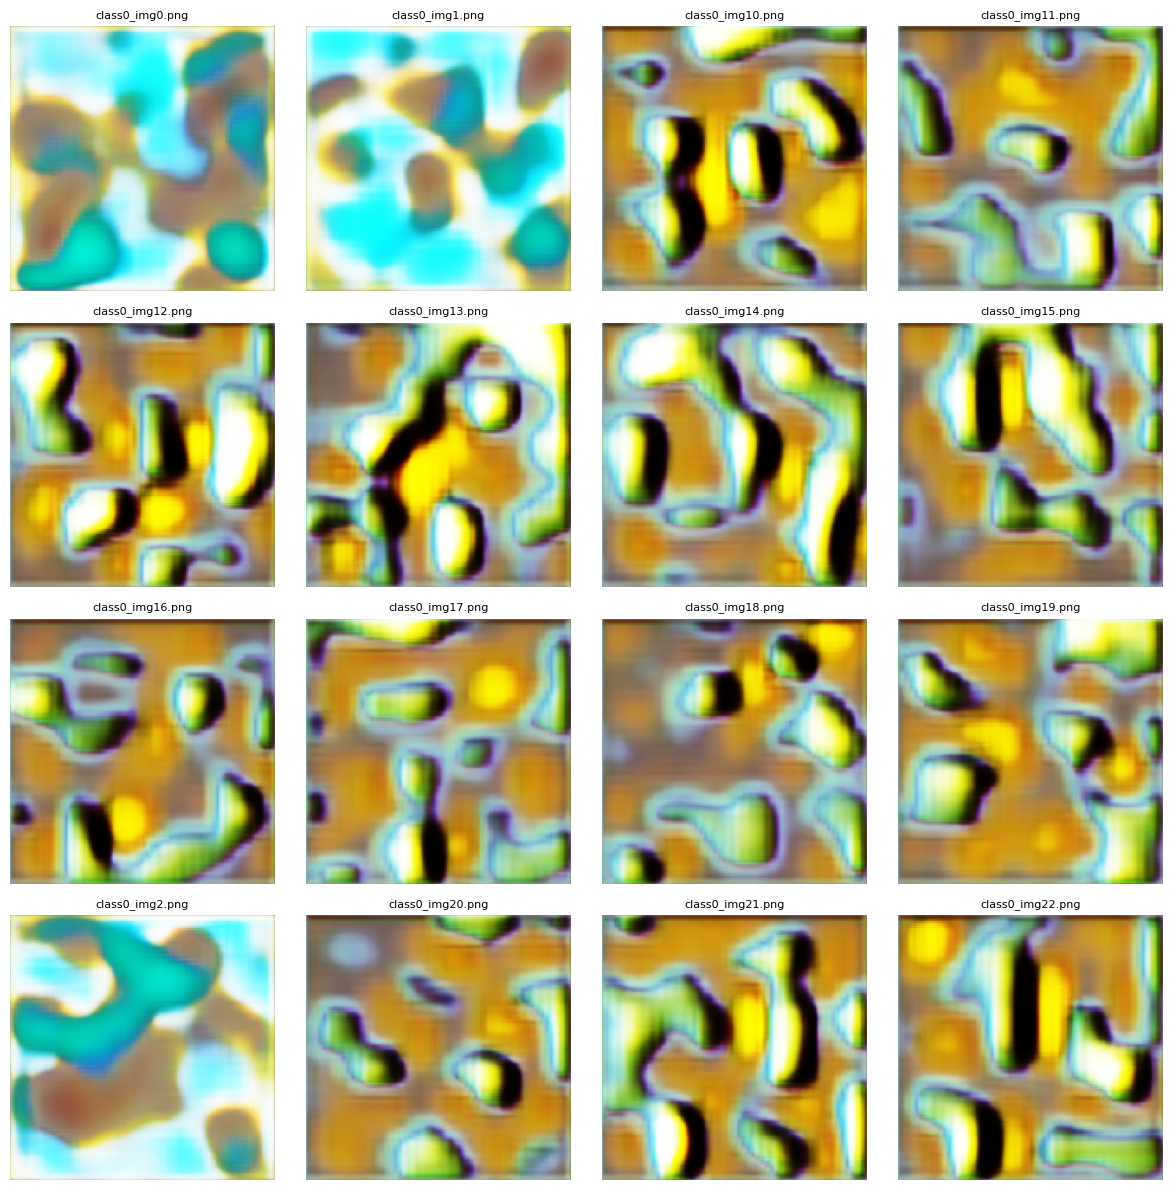

In [116]:
folder_path = 'generated_images'

def show_generated_images(folder_path, num_images=16):
    image_files = sorted(os.listdir(folder_path))[:num_images]
    
    plt.figure(figsize=(12, 12))
    for idx, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        image = Image.open(img_path)

        plt.subplot(4, 4, idx + 1)
        plt.imshow(image)
        plt.title(img_file, fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Вызов
show_generated_images('generated_images', num_images=16)


In [ ]:
train_df_final, val_df_final = train_test_split(augmented_train_df, test_size=0.2, stratify=augmented_train_df['label'])

train_dataset = ImageDataset(train_df_final, transform=train_transform)
val_dataset = ImageDataset(val_df_final, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
